<a href="https://colab.research.google.com/github/luis8choa/Computer_Vision/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar modulos

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

##Verificar que se esta trabajando con la GPU

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

##Descargar dataset MNIST (Números del 0 al 9)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


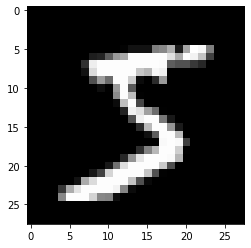

In [ ]:
plt.figure()
plt.imshow(x_train[0,:,:],'gray')

## Normalización y vector categórico

In [ ]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

x_train = np.expand_dims(x_train, axis=3)
x_test = n
p.expand_dims(x_test, axis=3)

print(y_train)

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

[5 0 4 ... 5 6 8]


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


##Definir la arquitectura de la red CNN

In [ ]:
def model():
    # create model
    input_shape = (28, 28,1) #x_train.shape
    model = Sequential()
    model.add(Conv2D(16, (5, 5), input_shape=(input_shape), activation='relu'))#Features maps, (Kernel size) (1, row, col)
    model.add(MaxPooling2D(pool_size=(3, 3)))#downsampling
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))#downsampling

    model.add(Dropout(0.2))#Fully-conected reduces
    model.add(Flatten())#Perceptron input Layer
    model.add(Dense(128, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #categorical_crossentropy: is designed to quantify the difference between two probability distributions.
    return model

In [ ]:
model = model()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8

##Entrenar modelo

In [ ]:
print(x_train.shape)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, verbose=1, shuffle=True)

(60000, 28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0601 - accuracy: 0.9809 - val_loss: 0.0324 - val_accuracy: 0.9889
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9811 - val_loss: 0.0296 - val_accuracy: 0.9895
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0545 - accuracy: 0.9824 - val_loss: 0.0271 - val_accuracy: 0.9918
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0559 - accuracy: 0.9817 - val_loss: 0.0328 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9833 - val_loss: 0.0309 - val_accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9833 - val_loss: 0.0305 - val_accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0491 - accuracy: 0.9840 - val_loss: 0.0

##Graficar evolución del modelo

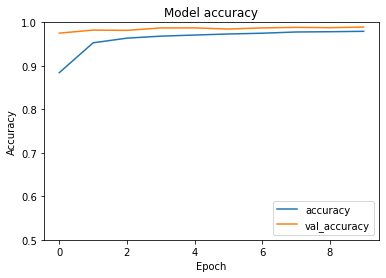

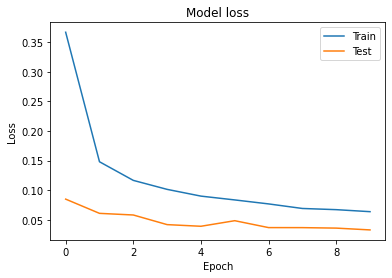

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
Score = model.evaluate(x_test, y_test, verbose=0)[1]

print(np.round(Score,decimals=4))

outputTrain=model.predict(x_test)

0.9892


##Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test.argmax(axis=1),outputTrain.argmax(axis=1))

print(confusion_mtx)

[[ 975    0    1    0    0    0    0    2    2    0]
 [   0 1131    0    2    0    0    0    2    0    0]
 [   1    1 1018    2    0    0    0    6    4    0]
 [   0    0    0 1006    0    0    0    3    1    0]
 [   0    0    0    0  978    0    0    0    2    2]
 [   1    0    0   14    0  873    1    1    1    1]
 [   5    3    0    1    3    1  936    0    9    0]
 [   0    2    1    2    0    0    0 1018    3    2]
 [   0    0    1    2    0    2    0    1  964    4]
 [   0    0    0    1    6    1    0    6    2  993]]


Matriz de confusión estilizada

In [ ]:
  def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):

      import itertools

      classes = ['0', '1', '2', '3','4', '5', '6', '7', '8',  '9']

      plt.figure(figsize = (10,10))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

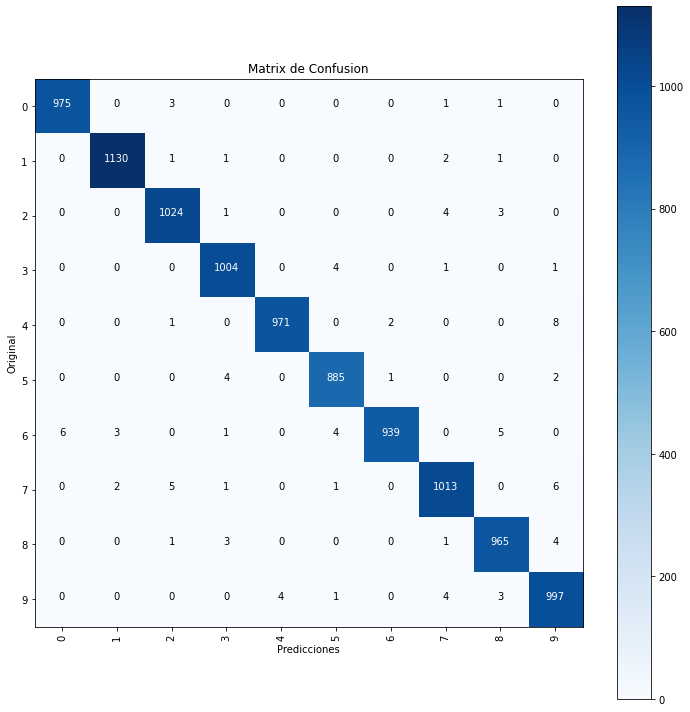

In [ ]:
plot_confusion_matrix(confusion_mtx, num_classes)